In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gradio --upgrade

In [2]:
!unzip '/content/drive/MyDrive/Estudios/Talento Tech/Documents/Technical Component/8_transfer_learning/Workshop/Gatos.zip'
!unzip '/content/drive/MyDrive/Estudios/Talento Tech/Documents/Technical Component/8_transfer_learning/Workshop/Perros.zip'
!unzip '/content/drive/MyDrive/Estudios/Talento Tech/Documents/Technical Component/8_transfer_learning/Workshop/Caballos.zip'

Archive:  /content/drive/MyDrive/Estudios/Talento Tech/Documents/Technical Component/8_transfer_learning/Workshop/Gatos.zip
  inflating: Gatos/00TB-MEOWS-square640.jpg  
  inflating: Gatos/100691619-what-is-cat-fostering-632x475.jpg  
  inflating: Gatos/107091667.jpg     
  inflating: Gatos/1200px-Cat_August_2010-4.jpg  
  inflating: Gatos/12cli-cats-facebookJumbo.jpg  
  inflating: Gatos/220726-cat-theo-elise-ew-636p-6cd3b0.jpg  
  inflating: Gatos/220805-domestic-cat-mjf-1540-382ba2.jpg  
  inflating: Gatos/2AE14CDD-1265-470C-9B15F49024186C10_source.jpg  
  inflating: Gatos/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg  
  inflating: Gatos/360_F_295949484_8BrlWkTrPXTYzgMn3UebDl1O13PcVNMU.jpg  
  inflating: Gatos/640px-Cat_November_2010-1a.jpg  
  inflating: Gatos/728px-What_kind_of_cat_am_i.png  
  inflating: Gatos/800px-Cat03.jpg   
  inflating: Gatos/AmericanBobtail_body_6.jpg  
  inflating: Gatos/Asana3808_1200x867.jpg  
  inflating: Gatos/Asana3808_Dashboard_Standard.jpg  

In [3]:
# Mostrar cantidad de imágenes en carpetas
!ls /content/Gatos | wc -l
!ls /content/Perros | wc -l
!ls /content/Caballos | wc -l

362
384
309


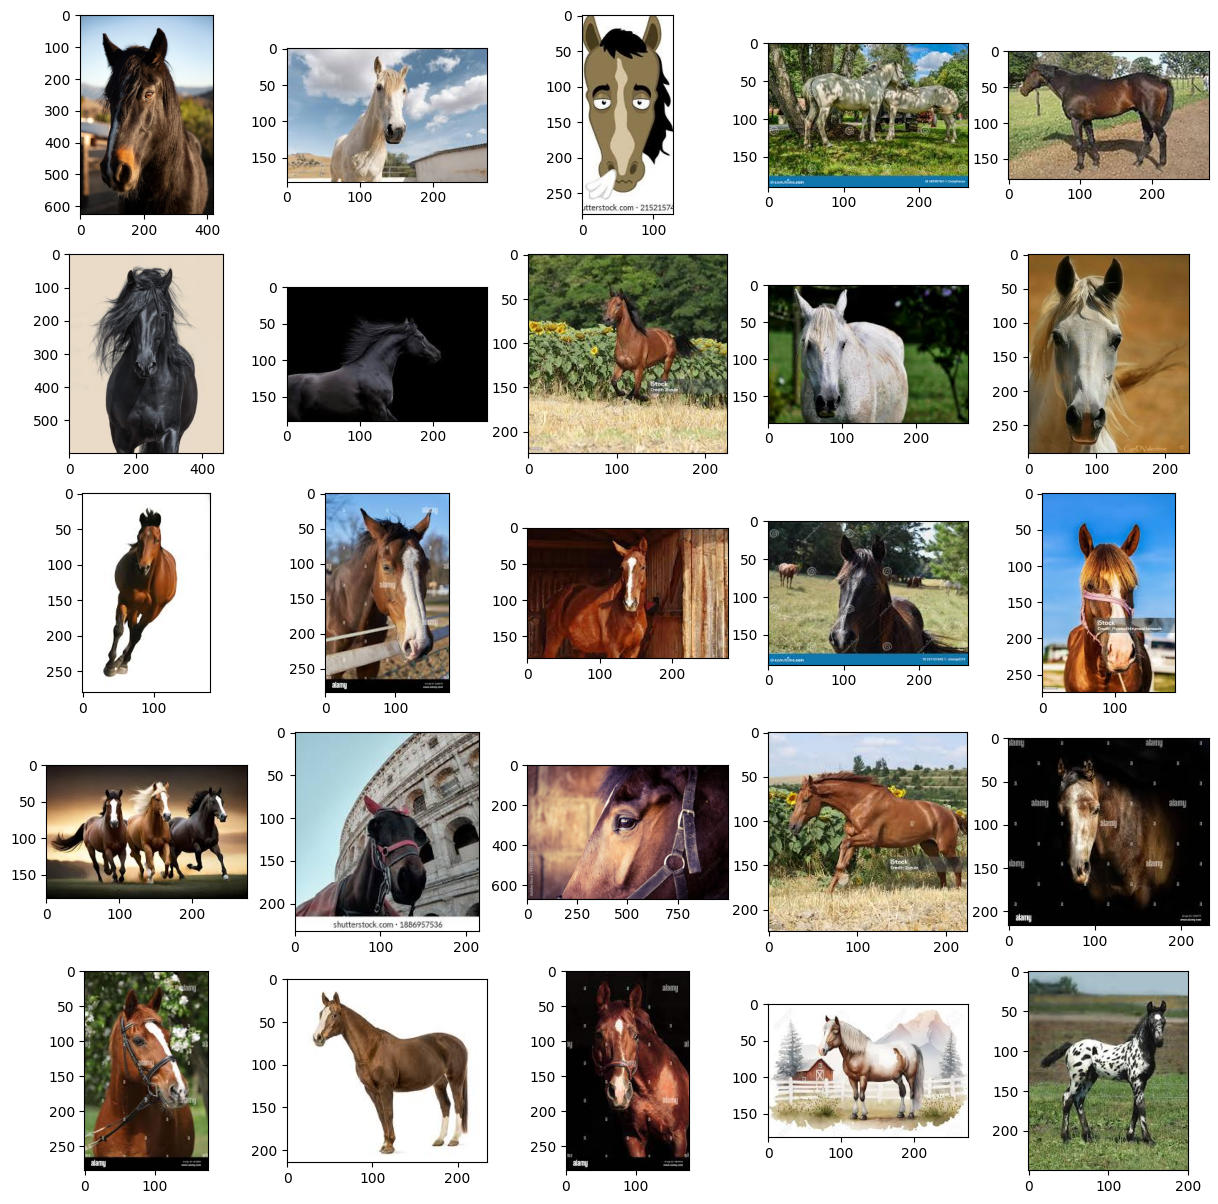

In [4]:
# Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/Caballos'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [5]:
# Crear carpetas para los conjuntos de datos

!mkdir dataset
!mkdir dataset/caballo
!mkdir dataset/perro
!mkdir dataset/gato

In [6]:
# Copiar imagenes que subimos a carpetas del dataset
# Limitar para que todos tengan la misma cantidad de imagenes
# maximo 341 (el num. menor de imagenes que subi)

import shutil

In [7]:
carpeta_fuente = '/content/Perros'
carpeta_destino = '/content/dataset/perro'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 350:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [8]:
carpeta_fuente = '/content/Gatos'
carpeta_destino = '/content/dataset/gato'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 350:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [9]:
carpeta_fuente = '/content/Caballos'
carpeta_destino = '/content/dataset/caballo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 350:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [10]:
# Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/perro | wc -l
!ls /content/dataset/gato | wc -l
!ls /content/dataset/caballo | wc -l

350
350
309


Found 803 images belonging to 3 classes.
Found 200 images belonging to 3 classes.


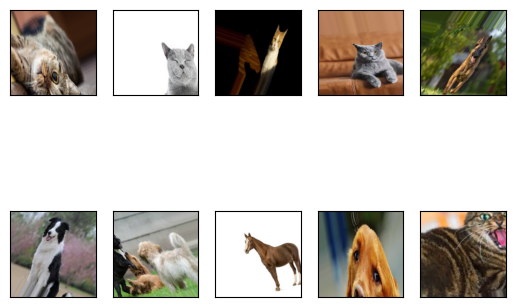

In [11]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    subset='training'
)

data_gen_pruebas = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    subset='validation'
)

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [13]:
import tensorflow as tf
import tensorflow_hub as hub

In [14]:
mobilenet_v2_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

mobilenet_v2 = hub.KerasLayer(
    mobilenet_v2_URL,
    input_shape=(224,224,3)
)

# Congelar el modelo descargado
mobilenet_v2.trainable = False

In [16]:
mobilenet_v3_URL = "https://www.kaggle.com/models/google/mobilenet-v3/TensorFlow2/large-075-224-classification/1"

mobilenet_v3 = hub.KerasLayer(
    mobilenet_v3_URL,
    input_shape=(224,224,3)
)

# Congelar el modelo descargado
mobilenet_v3.trainable = False

In [17]:
mobilenet_v2_model = tf.keras.Sequential(
    [
        mobilenet_v2,
        tf.keras.layers.Dense(3, activation='softmax')
    ]
)

In [18]:
mobilenet_v3_model = tf.keras.Sequential(
    [
        mobilenet_v3,
        tf.keras.layers.Dense(3, activation='softmax')
    ]
)

In [19]:
mobilenet_v2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [20]:
mobilenet_v3_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              4013897   
                                                                 
 dense_1 (Dense)             (None, 3)                 3006      
                                                                 
Total params: 4016903 (15.32 MB)
Trainable params: 3006 (11.74 KB)
Non-trainable params: 4013897 (15.31 MB)
_________________________________________________________________


In [21]:
mobilenet_v2_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mobilenet_v3_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
best_callback_mobilenet_v2_model = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_callback_mobilenet_v2_model.h5",
    monitor="val_accuracy",
    verbose = True,
    save_best_only = True,
    save_weights_only=True,
    mode="max"
    )

best_callback_mobilenet_v3_model = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_callback_mobilenet_v3_model.h5",
    monitor="val_accuracy",
    verbose = True,
    save_best_only = True,
    save_weights_only=True,
    mode="max"
    )

In [23]:
%%time

#Entrenar el modelo
EPOCHS = 30

mobilenet_v2_model_historial = mobilenet_v2_model.fit(
    data_gen_entrenamiento,
    epochs = EPOCHS,
    batch_size = 32,
    validation_data = data_gen_pruebas,
    callbacks=[best_callback_mobilenet_v2_model]
)

Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 0.9258 - accuracy: 0.5766

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: val_accuracy improved from -inf to 0.83000, saving model to best_callback_mobilenet_v2_model.h5
26/26 [==============================] - 24s 714ms/step - loss: 0.9258 - accuracy: 0.5766 - val_loss: 0.5096 - val_accuracy: 0.8300
Epoch 2/30
26/26 [==============================] - ETA: 0s - loss: 0.4702 - accuracy: 0.8020
Epoch 2: val_accuracy improved from 0.83000 to 0.88500, saving model to best_callback_mobilenet_v2_model.h5
26/26 [==============================] - 17s 675ms/step - loss: 0.4702 - accuracy: 0.8020 - val_loss: 0.3183 - val_accuracy: 0.8850
Epoch 3/30
26/26 [==============================] - ETA: 0s - loss: 0.3469 - accuracy: 0.8605
Epoch 3: val_accuracy improved from 0.88500 to 0.90500, saving model to best_callback_mobilenet_v2_model.h5
26/26 [==============================] - 15s 594ms/step - loss: 0.3469 - accuracy: 0.8605 - val_loss: 0.2658 - val_accuracy: 0.9050
Epoch 4/30
26/26 [==============================] - ETA: 0s - loss: 0.2844 - accuracy: 0.8954


In [24]:
%%time

#Entrenar el modelo
EPOCHS = 30

mobilenet_v3_model_historial = mobilenet_v3_model.fit(
    data_gen_entrenamiento,
    epochs = EPOCHS,
    batch_size = 32,
    validation_data = data_gen_pruebas,
    callbacks=[best_callback_mobilenet_v3_model]
)

Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 0.8402 - accuracy: 0.6563
Epoch 1: val_accuracy improved from -inf to 0.84000, saving model to best_callback_mobilenet_v3_model.h5
26/26 [==============================] - 23s 659ms/step - loss: 0.8402 - accuracy: 0.6563 - val_loss: 0.4076 - val_accuracy: 0.8400
Epoch 2/30
26/26 [==============================] - ETA: 0s - loss: 0.3861 - accuracy: 0.8555
Epoch 2: val_accuracy improved from 0.84000 to 0.91000, saving model to best_callback_mobilenet_v3_model.h5
26/26 [==============================] - 17s 632ms/step - loss: 0.3861 - accuracy: 0.8555 - val_loss: 0.2996 - val_accuracy: 0.9100
Epoch 3/30
26/26 [==============================] - ETA: 0s - loss: 0.2864 - accuracy: 0.8917
Epoch 3: val_accuracy did not improve from 0.91000
26/26 [==============================] - 15s 570ms/step - loss: 0.2864 - accuracy: 0.8917 - val_loss: 0.2333 - val_accuracy: 0.8900
Epoch 4/30
26/26 [==============================] - ETA: 0

In [29]:
mobilenet_v2_model.save('mobilenet_v2_model')
mobilenet_v3_model.save('mobilenet_v3_model')

In [25]:
# Graficas de precisión
def accuracy_plot(historial_model):
  acc = historial_model.history['accuracy']
  val_acc = historial_model.history['val_accuracy']

  loss = historial_model.history['loss']
  val_loss = historial_model.history['val_loss']

  rango_epocas = range(30)

  plt.figure(figsize=(15,8))
  plt.subplot(1,2,1)
  plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
  plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
  plt.legend(loc='lower right')
  plt.title('Precisión de entrenamiento y pruebas')

  plt.subplot(1,2,2)
  plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
  plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
  plt.legend(loc='upper right')
  plt.title('Pérdida de entrenamiento y pruebas')
  plt.show()

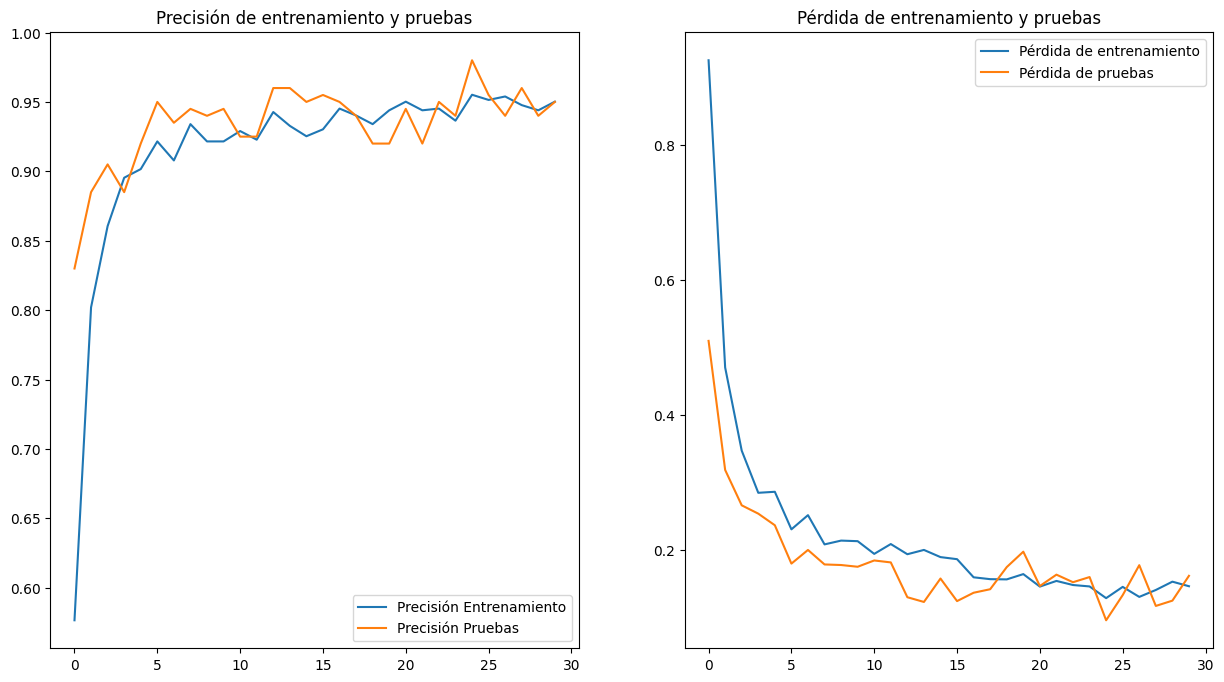

In [26]:
accuracy_plot(mobilenet_v2_model_historial)

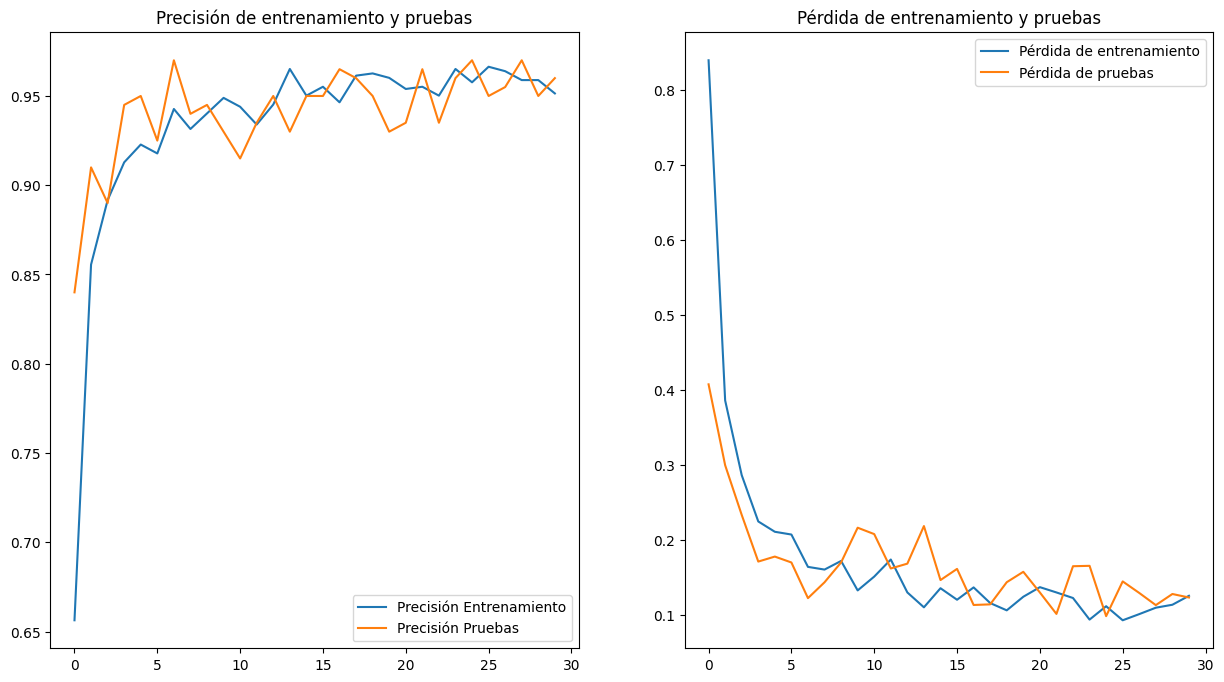

In [27]:
accuracy_plot(mobilenet_v3_model_historial)

In [35]:
mobilenet_v2_model = tf.keras.models.load_model('/content/mobilenet_v2_model')
mobilenet_v3_model = tf.keras.models.load_model('/content/mobilenet_v3_model')

# Check its architecture
mobilenet_v3_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              4013897   
                                                                 
 dense_1 (Dense)             (None, 3)                 3006      
                                                                 
Total params: 4016903 (15.32 MB)
Trainable params: 3006 (11.74 KB)
Non-trainable params: 4013897 (15.31 MB)
_________________________________________________________________


In [ ]:
import gradio as gr
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf  # Asegúrate de tener esta librería si estás trabajando con modelos de Keras

# Suponiendo que tienes un modelo cargado llamado 'new_model'.
# new_model = tf.keras.models.load_model('ruta_al_modelo')

# Esta función adaptada trabaja directamente con la imagen que se pasa como un parámetro.
def categorizar(image):
    # Convertir la imagen en un array de numpy
    img = np.array(image)

    # Aquí se puede agregar la normalización si es necesario para tu modelo.
    img = img / 255.0

    # Cambiar tamaño de la imagen al esperado por el modelo (por ejemplo, 224x224)
    img = cv2.resize(img, (224, 224))

    # Realizar la predicción
    prediccion = mobilenet_v3_model.predict(img.reshape(-1, 224, 224, 3))
    categoria_predicha = np.argmax(prediccion, axis=-1)[0]  # Asegurar que obtiene el índice de la categoría

    # Diccionario de etiquetas de ejemplo
    etiquetas = {0: "Caballo", 1: "Gato", 2: "Perro"}  # Añade más categorías según tu modelo
    label_predicha = etiquetas.get(categoria_predicha, "Categoría desconocida")

    # Retornar la etiqueta predicha
    return label_predicha

def predict_with_model(image):
    # Procesa la imagen con la función de categorización
    return categorizar(image)

# Creación de la interfaz de Gradio
interface = gr.Interface(fn=predict_with_model,
                         inputs=gr.Image(),  # Corrección aquí: solo gr.inputs.Image() es necesario sin el argumento 'shape'
                         outputs="label")

interface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://78a97620f513208e73.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 23ms/step
